In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from collections import OrderedDict
%matplotlib inline
%config InlineBackend.figure_format='retina'




# Model construction

In [2]:
PATH = os.getcwd()
df_path = os.path.join(PATH, 'cleaned_StarryData2.csv')


df = pd.read_csv(df_path)
df

,formula,Temperature,zt
0,Mn34.6W1.8Si63.6,350,0.127878
1,Mn34.6W1.8Si63.6,400,0.174548
2,Mn34.6W1.8Si63.6,450,0.223062
3,Mn34.6W1.8Si63.6,500,0.272720
4,Mn34.6W1.8Si63.6,550,0.325687
...,...,...,...
18121,ZrNiSn0.98Sb0.02,550,0.516041
18122,ZrNiSn0.9Sb0.1,450,0.062716
18123,ZrPtSn,750,0.002874
18124,ZrTe5,100,0.008020


In [3]:
print('DataFrame column names before renaming:')
print(df.columns)


rename_dict = {'zt': 'target'}
df = df.rename(columns=rename_dict)


print('\nDataFrame column names after renaming:')
print(df.columns)


DataFrame column names before renaming:
Index(['formula', 'Temperature', 'zt'], dtype='object')

DataFrame column names after renaming:
Index(['formula', 'Temperature', 'target'], dtype='object')


In [4]:
# Import the package and the generate_features function
from cbfv.composition import generate_features

X_unscaled, y, formulae_train, skipped_train = generate_features(df, elem_prop='Magpie', drop_duplicates=False, extend_features=True, sum_feat=True)


Processing Input Data: 100%|███████████| 18126/18126 [00:00<00:00, 68714.09it/s]


	Featurizing Compositions...


Assigning Features...: 100%|███████████| 18126/18126 [00:00<00:00, 29859.94it/s]


	Creating Pandas Objects...


In [5]:
features = ['avg_AtomicWeight', 'mode_NdValence', 'avg_GSvolume_pa', 'Temperature',
       'avg_CovalentRadius', 'dev_CovalentRadius', 'mode_NUnfilled',
       'range_NsValence', 'range_Row', 'min_Column', 'mode_SpaceGroupNumber',
       'min_Row', 'avg_MendeleevNumber', 'avg_NfUnfilled',
       'max_MendeleevNumber', 'range_NValence', 'mode_NValence',
       'avg_NdValence', 'avg_SpaceGroupNumber', 'avg_NpValence', 'avg_Column',
       'min_GSvolume_pa', 'sum_NdValence', 'max_NValence',
       'min_Electronegativity', 'dev_MeltingT', 'min_NpUnfilled',
       'range_NfUnfilled', 'range_NdValence', 'max_AtomicWeight',
       'range_SpaceGroupNumber', 'dev_Electronegativity', 'range_Number',
       'max_Row', 'sum_NsUnfilled', 'mode_MeltingT', 'range_Electronegativity',
       'max_Number', 'mode_NsUnfilled', 'dev_NpUnfilled',
       'mode_CovalentRadius', 'min_SpaceGroupNumber', 'min_NdValence',
       'range_CovalentRadius', 'avg_MeltingT', 'avg_NdUnfilled',
       'dev_NfUnfilled', 'mode_GSvolume_pa',
       'min_MeltingT', 'range_NpValence', 'avg_Electronegativity',
       'range_Column', 'dev_NfValence', 'dev_GSbandgap', 'sum_NValence',
       'range_NfValence', 'min_CovalentRadius', 'avg_NpUnfilled',
       'mode_Number', 'sum_GSvolume_pa', 'range_AtomicWeight', 'avg_NValence',
       'dev_NValence', 'avg_GSbandgap', 'dev_MendeleevNumber', 'dev_Number',
       'sum_NpValence', 'max_NUnfilled', 'max_CovalentRadius',
       'range_NpUnfilled', 'range_GSvolume_pa', 'min_NUnfilled',
       'min_NValence', 'mode_MendeleevNumber','max_GSvolume_pa']

X_unscaled = X_unscaled[features]

X_unscaled

,avg_AtomicWeight,mode_NdValence,avg_GSvolume_pa,Temperature,avg_CovalentRadius,dev_CovalentRadius,mode_NUnfilled,range_NsValence,range_Row,min_Column,...,dev_Number,sum_NpValence,max_NUnfilled,max_CovalentRadius,range_NpUnfilled,range_GSvolume_pa,min_NUnfilled,min_NValence,mode_MendeleevNumber,max_GSvolume_pa
0,40.180062,0.0,16.917445,350,121.606000,13.490832,4.0,0.0,3.0,6.0,...,6.214992,127.20,6.0,162.0,4.0,9.952414,4.0,4.0,78.0,20.440000
1,40.180062,0.0,16.917445,400,121.606000,13.490832,4.0,0.0,3.0,6.0,...,6.214992,127.20,6.0,162.0,4.0,9.952414,4.0,4.0,78.0,20.440000
2,40.180062,0.0,16.917445,450,121.606000,13.490832,4.0,0.0,3.0,6.0,...,6.214992,127.20,6.0,162.0,4.0,9.952414,4.0,4.0,78.0,20.440000
3,40.180062,0.0,16.917445,500,121.606000,13.490832,4.0,0.0,3.0,6.0,...,6.214992,127.20,6.0,162.0,4.0,9.952414,4.0,4.0,78.0,20.440000
4,40.180062,0.0,16.917445,550,121.606000,13.490832,4.0,0.0,3.0,6.0,...,6.214992,127.20,6.0,162.0,4.0,9.952414,4.0,4.0,78.0,20.440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18121,89.562800,2.0,22.255167,550,146.000000,19.333333,2.0,0.0,1.0,4.0,...,7.560000,2.02,8.0,175.0,4.0,22.965000,2.0,4.0,44.0,33.285000
18122,89.644133,2.0,22.209167,450,146.000000,19.333333,2.0,0.0,1.0,4.0,...,7.577778,2.10,8.0,175.0,4.0,22.965000,2.0,4.0,44.0,33.285000
18123,135.006000,2.0,23.833333,750,150.000000,16.666667,2.0,1.0,1.0,4.0,...,14.666667,2.00,8.0,175.0,4.0,18.265000,2.0,4.0,44.0,33.285000
18124,121.537333,10.0,32.835278,100,144.166667,10.277778,2.0,0.0,0.0,4.0,...,3.333333,20.00,8.0,175.0,2.0,11.568333,2.0,4.0,90.0,34.763333


In [6]:
#Prepare Data for spliting
df2 = X_unscaled.copy()
df2['formula'] = df['formula']
df2['zt'] = y

df2

,avg_AtomicWeight,mode_NdValence,avg_GSvolume_pa,Temperature,avg_CovalentRadius,dev_CovalentRadius,mode_NUnfilled,range_NsValence,range_Row,min_Column,...,max_NUnfilled,max_CovalentRadius,range_NpUnfilled,range_GSvolume_pa,min_NUnfilled,min_NValence,mode_MendeleevNumber,max_GSvolume_pa,formula,zt
0,40.180062,0.0,16.917445,350,121.606000,13.490832,4.0,0.0,3.0,6.0,...,6.0,162.0,4.0,9.952414,4.0,4.0,78.0,20.440000,Mn34.6W1.8Si63.6,0.127878
1,40.180062,0.0,16.917445,400,121.606000,13.490832,4.0,0.0,3.0,6.0,...,6.0,162.0,4.0,9.952414,4.0,4.0,78.0,20.440000,Mn34.6W1.8Si63.6,0.174548
2,40.180062,0.0,16.917445,450,121.606000,13.490832,4.0,0.0,3.0,6.0,...,6.0,162.0,4.0,9.952414,4.0,4.0,78.0,20.440000,Mn34.6W1.8Si63.6,0.223062
3,40.180062,0.0,16.917445,500,121.606000,13.490832,4.0,0.0,3.0,6.0,...,6.0,162.0,4.0,9.952414,4.0,4.0,78.0,20.440000,Mn34.6W1.8Si63.6,0.272720
4,40.180062,0.0,16.917445,550,121.606000,13.490832,4.0,0.0,3.0,6.0,...,6.0,162.0,4.0,9.952414,4.0,4.0,78.0,20.440000,Mn34.6W1.8Si63.6,0.325687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18121,89.562800,2.0,22.255167,550,146.000000,19.333333,2.0,0.0,1.0,4.0,...,8.0,175.0,4.0,22.965000,2.0,4.0,44.0,33.285000,ZrNiSn0.98Sb0.02,0.516041
18122,89.644133,2.0,22.209167,450,146.000000,19.333333,2.0,0.0,1.0,4.0,...,8.0,175.0,4.0,22.965000,2.0,4.0,44.0,33.285000,ZrNiSn0.9Sb0.1,0.062716
18123,135.006000,2.0,23.833333,750,150.000000,16.666667,2.0,1.0,1.0,4.0,...,8.0,175.0,4.0,18.265000,2.0,4.0,44.0,33.285000,ZrPtSn,0.002874
18124,121.537333,10.0,32.835278,100,144.166667,10.277778,2.0,0.0,0.0,4.0,...,8.0,175.0,2.0,11.568333,2.0,4.0,90.0,34.763333,ZrTe5,0.008020


In [7]:
#check unique compositions

unique_formulae = df2['formula'].unique()
print(f'{len(unique_formulae)} unique compositions')

2761 unique compositions


In [8]:
# Set a random seed to ensure reproducibility across runs
np.random.seed(seed=5)

# Store a list of all unique formulae
all_formulae = unique_formulae.copy()

# Define the proportional size of the dataset split
test_size = 0.20

train_size = 1 - test_size

# Calculate the number of samples in each dataset split

num_test_samples = int(round(test_size * len(unique_formulae)))
num_train_samples = int(round((1  - test_size) * len(unique_formulae)))

# Randomly choose the formulate for the test dataset, and remove those from the unique formulae list
test_formulae = np.random.choice(all_formulae, size=num_test_samples, replace=False)
all_formulae = [f for f in all_formulae if f not in test_formulae]

# The remaining formulae will be used for the training dataset
train_formulae = all_formulae.copy()

print('Number of training formulae:', len(train_formulae))
print('Number of testing formulae:', len(test_formulae))


# Split the original dataset into the train/validation/test datasets using the formulae lists above
df_train = df2[df2['formula'].isin(train_formulae)]
df_test = df2[df2['formula'].isin(test_formulae)]
print('')
print('')
print(f'train dataset shape: {df_train.shape}')
print(f'test dataset shape: {df_test.shape}\n')



Number of training formulae: 2209
Number of testing formulae: 552


train dataset shape: (14435, 77)
test dataset shape: (3691, 77)



In [9]:
#Check intersection of the same composition between train and test set

train_formulae = set(df_train['formula'].unique())
test_formulae = set(df_test['formula'].unique())

common_formulae = train_formulae.intersection(test_formulae)


print(f'# of common formulae in intersection: {len(common_formulae)}; common formulae: {common_formulae}')


# of common formulae in intersection: 0; common formulae: set()


In [10]:
X_train_unscaled = df_train.drop(columns=['formula','zt'])
X_test_unscaled = df_test.drop(columns=['formula','zt'])

In [11]:
y_train = df_train[['zt']]
y_test = df_test[['zt']]

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import normalize

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

X_train = normalize(X_train)
X_test = normalize(X_test)


In [13]:
from xgboost import XGBRegressor

xgb_model=XGBRegressor(
            learning_rate=0.02, 
            max_depth=4, 
            n_estimators=1500, 
            colsample_bytree=1.0, 
            subsample=1,
            reg_alpha=6,
)

In [14]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [15]:
y_pred_train = xgb_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)**(1/2)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Train - Mean Squared Error: %.3f" % mse_train)
print("Train - Mean average Error: %.3f" % mae_train)
print("Train - R2: %.3f" % r2_train)

Train - Mean Squared Error: 0.103
Train - Mean average Error: 0.070
Train - R2: 0.900


In [16]:
y_pred_test = xgb_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)**(1/2)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Test - Mean Squared Error: %.3f" % mse_test)
print("Test - Mean average Error: %.3f" % mae_test)
print("Test - R2: %.3f" % r2_test)

Test - Mean Squared Error: 0.151
Test - Mean average Error: 0.103
Test - R2: 0.815


In [17]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

def plot_pred_act34(act, pred,y_act_train,y_pred_train ,ax, ax_histx, ax_histy, model, testing_set ,reg_line=True, label='', colormark=''):
    xy_max = np.max([2.5, 2.5])

    #plot = plt.figure(figsize=(8,8))

    ax.plot(y_act_train, y_pred_train, 'o', ms=9, mec='k', mfc='Orange', alpha=0.4, )
    ax.plot(act, pred, 'v', ms=9, mec='k', mfc = colormark, alpha=0.4)
    ax.plot([0, xy_max], [0, xy_max], 'k--', label='ideal line')
    ax.legend([
        f'Train set: $R^{2}$ = {r2_score(y_act_train, y_pred_train):0.3f}, $MAE$ = {mean_absolute_error(y_act_train, y_pred_train):0.3f}', 
        f'Test  set: $R^{2}$ = {r2_score(act, pred):0.3f}, $MAE$ = {mean_absolute_error(act, pred):0.3f}',
        'ideal line'
    
    ], loc='upper left',fontsize=12)
    

    #ax.legend([f'training set:    {r2_score(y_act_train, y_pred_train):0.3f}', f'{testing_set}    {r2_score(act, pred):0.3f}', 'ideal line'], loc='upper left',fontsize=12)
    # if(testing_set == 'validation set:'):
    #    ax.legend([f'training set:       {r2_score(y_act_train, y_pred_train):0.3f}', f'{testing_set}    {r2_score(act, pred):0.3f}', 'ideal line'], loc='upper left',fontsize=12)
   # else:
   #     ax.legend([f'training set:    {r2_score(y_act_train, y_pred_train):0.3f}', f'{testing_set}    {r2_score(act, pred):0.3f}', 'ideal line'], loc='upper left',fontsize=12)
    
    #เขียนข้อความในกราฟ
    #plt.xlim([0, 2])
    #plt.ylim([0, 2])
    
        # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    
    
        # now determine nice limits by hand:
    binwidth = xy_max/15
    xymax = max(np.max(np.abs(act)), np.max(np.abs(pred)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(0, lim + binwidth, binwidth)
    ax_histx.hist(act, bins=bins)
    ax_histy.hist(pred, bins=bins, orientation='horizontal',)
    
    
    #plt.text(-0.050, 1.64, '- 551 datasets', fontsize=16,  color='#006400', family="Times New Roman")
    #plt.text(-0.050, 1.54, ' (excluding experimental data)', fontsize=16,  color='#006400',family="Times New Roman")
    #plt.text(-0.050, 1.44, '- 30 important features', fontsize=16,  color='#006400',family="Times New Roman")
    
    if reg_line:
        polyfit = np.polyfit(act, pred, deg=1)
        reg_ys = np.poly1d(polyfit)(np.unique(act))
        #plt.plot(np.unique(act), reg_ys, alpha=0.8, label='linear fit')
    ax.axis('scaled')
   
   # ax.xlabel(f'Experimental {label}',fontsize=16,family="Times New Roman")

   # ax.ylabel(f'Predicted {label}', fontsize=16,family="Times New Roman")
    
    #ax.title(f'{type(model).__name__}, R2: {r2_score(act, pred):0.3f}, RMSE: {np.sqrt(mean_squared_error(act, pred)):0.3f}', fontsize=18, family="Times New Roman")
    
   # plt.savefig(f'./proposalPicture/30importantfeatures/NoExp_{type(model).__name__}.png',dpi=300)
    #plt.legend(loc='upper left',fontsize=16)
    plt.rcParams.update({'font.size': 14})
    return ax




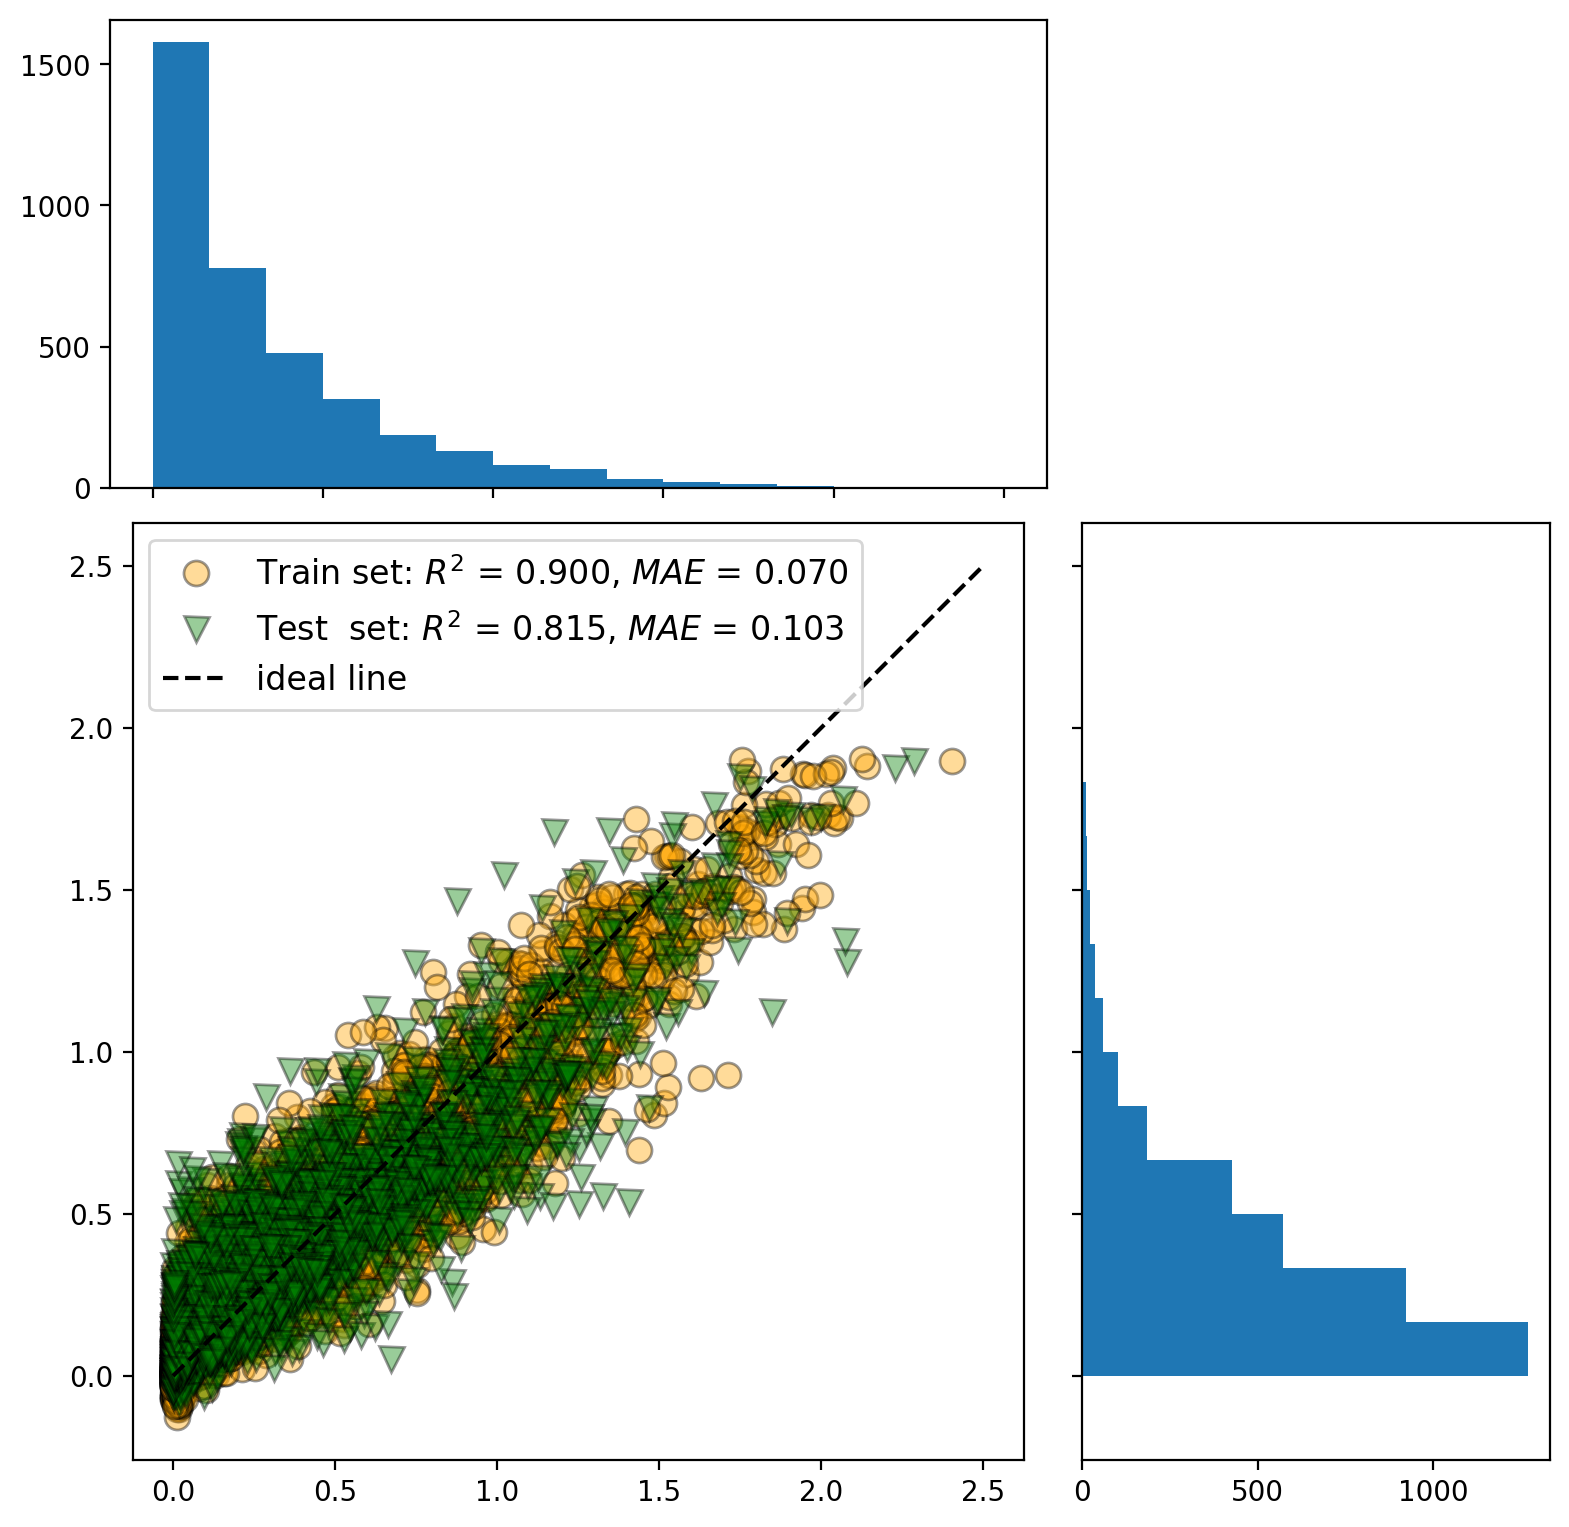

In [18]:


fig = plt.figure(figsize=(8,8))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(2, 1), height_ratios=(1, 2),
                              left=0.0, right=0.9, bottom=0.0, top=0.9,
                              wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)


  

y_act_train = y_train.to_numpy().ravel()
y_pred_train = xgb_model.predict(X_train)
y_act_test = y_test.to_numpy().ravel()
y_pred_test = xgb_model.predict(X_test)

plot = plot_pred_act34(y_act_test, y_pred_test, y_act_train, y_pred_train, ax,ax_histx, ax_histy,xgb_model, "testing set: ", reg_line=True, label='ZT',colormark='green')



In [19]:
X_unscaled.columns

Index(['avg_AtomicWeight', 'mode_NdValence', 'avg_GSvolume_pa', 'Temperature',
       'avg_CovalentRadius', 'dev_CovalentRadius', 'mode_NUnfilled',
       'range_NsValence', 'range_Row', 'min_Column', 'mode_SpaceGroupNumber',
       'min_Row', 'avg_MendeleevNumber', 'avg_NfUnfilled',
       'max_MendeleevNumber', 'range_NValence', 'mode_NValence',
       'avg_NdValence', 'avg_SpaceGroupNumber', 'avg_NpValence', 'avg_Column',
       'min_GSvolume_pa', 'sum_NdValence', 'max_NValence',
       'min_Electronegativity', 'dev_MeltingT', 'min_NpUnfilled',
       'range_NfUnfilled', 'range_NdValence', 'max_AtomicWeight',
       'range_SpaceGroupNumber', 'dev_Electronegativity', 'range_Number',
       'max_Row', 'sum_NsUnfilled', 'mode_MeltingT', 'range_Electronegativity',
       'max_Number', 'mode_NsUnfilled', 'dev_NpUnfilled',
       'mode_CovalentRadius', 'min_SpaceGroupNumber', 'min_NdValence',
       'range_CovalentRadius', 'avg_MeltingT', 'avg_NdUnfilled',
       'dev_NfUnfilled', 'mode_G

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


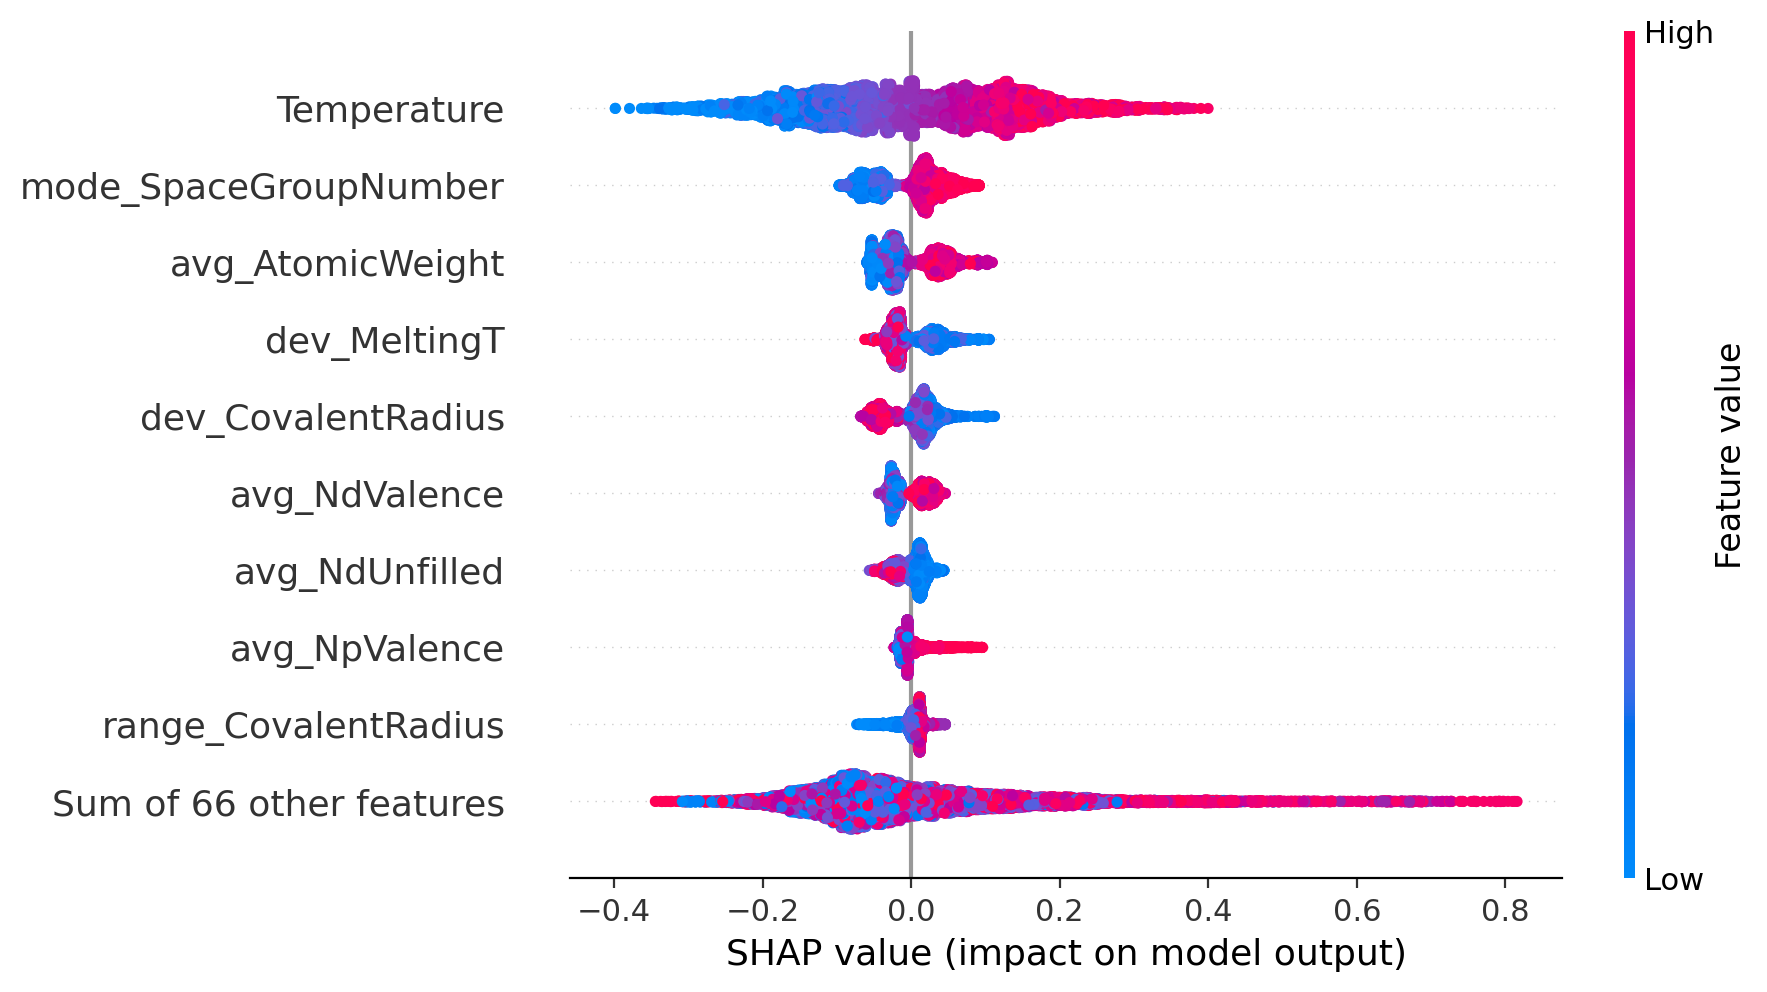

In [20]:
import shap

X_train = pd.DataFrame(X_train, columns = X_unscaled.columns)
explainer = shap.Explainer(xgb_model)

shap_values = explainer(X_train)

shap.plots.beeswarm(shap_values, show=False, max_display=10)


# ZT Prediction of the composition obtained from Material Project


In [22]:
df_path_candidate = os.path.join(PATH, 'new_setfrom_matPro.csv')


df_candidate = pd.read_csv(df_path_candidate)

print(f' DataFrame shape: {df_candidate.shape}')
df_candidate['Temperature'] = 800
df_candidate

 DataFrame shape: (78298, 3)


,formula,Temperature,target
0,ZrAg2,800,0
1,YbAg2,800,0
2,AgC,800,0
3,AgC,800,0
4,InAg,800,0
...,...,...,...
78293,TmUTe4,800,0
78294,TmUTe6,800,0
78295,Th4UTe5,800,0
78296,TiVW,800,0


In [23]:
df_candidate2 = df_candidate[ df_candidate['formula'].str.contains("()")==True ]
df_candidate3 = df_candidate2[ df_candidate2['formula'].str.contains("Feb")==False ]
df_candidate3 = df_candidate3.reset_index()

df_candidate3 = df_candidate3.drop(columns=['index'])
df_candidate3

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.


,formula,Temperature,target
0,ZrAg2,800,0
1,YbAg2,800,0
2,AgC,800,0
3,AgC,800,0
4,InAg,800,0
...,...,...,...
78287,TmUTe4,800,0
78288,TmUTe6,800,0
78289,Th4UTe5,800,0
78290,TiVW,800,0


In [24]:
X_candidate_unscaled, _,_,_= generate_features(df_candidate3, elem_prop='Magpie', drop_duplicates=False, extend_features=True, sum_feat=True)


Processing Input Data: 100%|███████████| 78292/78292 [00:01<00:00, 68603.48it/s]


	Featurizing Compositions...


Assigning Features...: 100%|███████████| 78292/78292 [00:02<00:00, 32004.44it/s]


	Creating Pandas Objects...


In [25]:
X_candidate_unscaled = X_candidate_unscaled[features]
X_candidate_unscaled

,avg_AtomicWeight,mode_NdValence,avg_GSvolume_pa,Temperature,avg_CovalentRadius,dev_CovalentRadius,mode_NUnfilled,range_NsValence,range_Row,min_Column,...,dev_Number,sum_NpValence,max_NUnfilled,max_CovalentRadius,range_NpUnfilled,range_GSvolume_pa,min_NUnfilled,min_NValence,mode_MendeleevNumber,max_GSvolume_pa
0,102.320133,10.0,18.618333,800,155.000000,13.333333,1.0,1.0,0.0,4.0,...,3.111111,0.0,8.0,175.0,0.0,6.865000,1.0,4.0,65.0,23.195000
1,129.596800,10.0,22.260000,800,159.000000,18.666667,1.0,1.0,1.0,3.0,...,10.222222,0.0,1.0,187.0,0.0,17.790000,0.0,11.0,65.0,34.120000
2,59.939450,0.0,10.985000,800,110.500000,34.500000,1.0,1.0,3.0,11.0,...,20.500000,2.0,4.0,145.0,4.0,10.690000,1.0,4.0,65.0,16.330000
3,59.939450,0.0,10.985000,800,110.500000,34.500000,1.0,1.0,3.0,11.0,...,20.500000,2.0,4.0,145.0,4.0,10.690000,1.0,4.0,65.0,16.330000
4,111.343100,10.0,20.295000,800,143.500000,1.500000,1.0,1.0,0.0,11.0,...,1.000000,1.0,5.0,145.0,5.0,7.930000,1.0,11.0,65.0,24.260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78287,152.893853,10.0,31.476389,800,156.333333,24.444444,2.0,0.0,2.0,3.0,...,12.666667,16.0,20.0,196.0,2.0,14.738333,1.0,6.0,90.0,34.763333
78288,146.570390,10.0,32.298125,800,151.750000,20.625000,2.0,0.0,2.0,3.0,...,10.687500,24.0,20.0,196.0,2.0,14.738333,1.0,6.0,90.0,34.763333
78289,180.418115,10.0,32.332167,800,171.000000,33.000000,2.0,0.0,2.0,3.0,...,19.200000,20.0,20.0,206.0,2.0,14.738333,2.0,4.0,90.0,34.763333
78290,94.216167,2.0,15.250000,800,158.333333,3.555556,6.0,0.0,2.0,4.0,...,22.888889,0.0,8.0,162.0,0.0,3.680000,6.0,4.0,43.0,16.690000


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import normalize

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)
X_candidate = scaler.transform(X_candidate_unscaled)

X_train = normalize(X_train)
X_test = normalize(X_test)
X_candidate = normalize(X_candidate)



In [27]:
xgb_model.fit(X_train, y_train)
predicted_candidate = xgb_model.predict(X_candidate)
df_prediction = pd.DataFrame()
df_prediction['formula'] = df_candidate3['formula']
predicted_candidate


array([0.30701178, 0.40962803, 0.1806032 , ..., 0.25775933, 0.16355199,
       0.25612292], dtype=float32)

In [28]:
df_prediction['ZT prediction'] = predicted_candidate
#df_prediction
df_prediction.sort_values(by='ZT prediction', ascending=False).to_csv("prediction.csv")

# 5-fold cross validation

In [29]:
X_unscaled, y, formulae_train, skipped_train = generate_features(df, elem_prop='Magpie', drop_duplicates=False, extend_features=True, sum_feat=True)


Processing Input Data: 100%|███████████| 18126/18126 [00:00<00:00, 55357.75it/s]


	Featurizing Compositions...


Assigning Features...: 100%|███████████| 18126/18126 [00:00<00:00, 30670.67it/s]


	Creating Pandas Objects...


In [30]:
X_unscaled = X_unscaled[features]
X_unscaled

,avg_AtomicWeight,mode_NdValence,avg_GSvolume_pa,Temperature,avg_CovalentRadius,dev_CovalentRadius,mode_NUnfilled,range_NsValence,range_Row,min_Column,...,dev_Number,sum_NpValence,max_NUnfilled,max_CovalentRadius,range_NpUnfilled,range_GSvolume_pa,min_NUnfilled,min_NValence,mode_MendeleevNumber,max_GSvolume_pa
0,40.180062,0.0,16.917445,350,121.606000,13.490832,4.0,0.0,3.0,6.0,...,6.214992,127.20,6.0,162.0,4.0,9.952414,4.0,4.0,78.0,20.440000
1,40.180062,0.0,16.917445,400,121.606000,13.490832,4.0,0.0,3.0,6.0,...,6.214992,127.20,6.0,162.0,4.0,9.952414,4.0,4.0,78.0,20.440000
2,40.180062,0.0,16.917445,450,121.606000,13.490832,4.0,0.0,3.0,6.0,...,6.214992,127.20,6.0,162.0,4.0,9.952414,4.0,4.0,78.0,20.440000
3,40.180062,0.0,16.917445,500,121.606000,13.490832,4.0,0.0,3.0,6.0,...,6.214992,127.20,6.0,162.0,4.0,9.952414,4.0,4.0,78.0,20.440000
4,40.180062,0.0,16.917445,550,121.606000,13.490832,4.0,0.0,3.0,6.0,...,6.214992,127.20,6.0,162.0,4.0,9.952414,4.0,4.0,78.0,20.440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18121,89.562800,2.0,22.255167,550,146.000000,19.333333,2.0,0.0,1.0,4.0,...,7.560000,2.02,8.0,175.0,4.0,22.965000,2.0,4.0,44.0,33.285000
18122,89.644133,2.0,22.209167,450,146.000000,19.333333,2.0,0.0,1.0,4.0,...,7.577778,2.10,8.0,175.0,4.0,22.965000,2.0,4.0,44.0,33.285000
18123,135.006000,2.0,23.833333,750,150.000000,16.666667,2.0,1.0,1.0,4.0,...,14.666667,2.00,8.0,175.0,4.0,18.265000,2.0,4.0,44.0,33.285000
18124,121.537333,10.0,32.835278,100,144.166667,10.277778,2.0,0.0,0.0,4.0,...,3.333333,20.00,8.0,175.0,2.0,11.568333,2.0,4.0,90.0,34.763333


In [31]:
# Set a random seed to ensure reproducibility across runs

def Radom_spliting_Data(data_grid, randomsplit):
    np.random.seed(seed=randomsplit)
    
    unique_formulae = data_grid['formula'].unique()
    # Store a list of all unique formulae
    
    all_formulae = unique_formulae.copy()

    # Define the proportional size of the dataset split
    set_1 = 0.20
    set_2 = 0.20
    set_3 = 0.20
    set_4 = 0.20
    set_5 = 0.20
    #train_size = 1 - val_size - test_size

    # Calculate the number of samples in each dataset split
    num_set_1_samples = int(round(set_1 * len(unique_formulae)))
    num_set_2_samples = int(round(set_2 * len(unique_formulae)))
    num_set_3_samples = int(round(set_3 * len(unique_formulae)))
    num_set_4_samples = int(round(set_4 * len(unique_formulae)))
    num_set_5_samples = int(round(set_5 * len(unique_formulae)))

    # Randomly choose the formulate for the validation dataset, and remove those from the unique formulae list
    set_1_formulae = np.random.choice(all_formulae, size=num_set_1_samples, replace=False)
    all_formulae = [f for f in all_formulae if f not in set_1_formulae]
    
    set_2_formulae = np.random.choice(all_formulae, size=num_set_2_samples, replace=False)
    all_formulae = [f for f in all_formulae if f not in set_2_formulae]
    
    set_3_formulae = np.random.choice(all_formulae, size=num_set_3_samples, replace=False)
    all_formulae = [f for f in all_formulae if f not in set_3_formulae]
    
    set_4_formulae = np.random.choice(all_formulae, size=num_set_4_samples, replace=False)
    all_formulae = [f for f in all_formulae if f not in set_4_formulae]
    
    set_5_formulae = np.random.choice(all_formulae, size=num_set_5_samples, replace=False)
    all_formulae = [f for f in all_formulae if f not in set_5_formulae]

    # The remaining formulae will be used for the training dataset
    #train_formulae = all_formulae.copy()


    print('Number of set 1 formulae:', len(set_1_formulae))
    print('Number of set 2 formulae:', len(set_2_formulae))
    print('Number of set 3 formulae:', len(set_3_formulae))
    print('Number of set 4 formulae:', len(set_4_formulae))
    print('Number of set 5 formulae:', len(set_5_formulae))
    # Split the original dataset into the train/validation/test datasets using the formulae lists above
    
    df_set_1 = df2[df2['formula'].isin(set_1_formulae)]
    df_set_2 = df2[df2['formula'].isin(set_2_formulae)]
    df_set_3 = df2[df2['formula'].isin(set_3_formulae)]
    df_set_4 = df2[df2['formula'].isin(set_4_formulae)]
    df_set_5 = df2[df2['formula'].isin(set_5_formulae)]
    print('--------------------------------------')
    print(f'dataset 1 shape: {df_set_1.shape}')
    print(f'dataset 2 shape: {df_set_2.shape}')
    print(f'dataset 3 shape: {df_set_3.shape}')
    print(f'dataset 4 shape: {df_set_4.shape}')
    print(f'dataset 5 shape: {df_set_5.shape}')
    
    
    df_set_1_formulae = set(df_set_1['formula'].unique())
    df_set_2_formulae = set(df_set_2['formula'].unique())
    df_set_3_formulae = set(df_set_3['formula'].unique())
    df_set_4_formulae = set(df_set_4['formula'].unique())
    df_set_5_formulae = set(df_set_5['formula'].unique())
    
    common_formulae1 = df_set_1_formulae.intersection(df_set_2_formulae)
    common_formulae2 = df_set_1_formulae.intersection(df_set_3_formulae)
    common_formulae3 = df_set_1_formulae.intersection(df_set_4_formulae)
    common_formulae4 = df_set_1_formulae.intersection(df_set_5_formulae)
    
    common_formulae4 = df_set_2_formulae.intersection(df_set_3_formulae)
    common_formulae5 = df_set_2_formulae.intersection(df_set_4_formulae)
    common_formulae6 = df_set_2_formulae.intersection(df_set_5_formulae)
    
    common_formulae7 = df_set_3_formulae.intersection(df_set_4_formulae)
    common_formulae8 = df_set_3_formulae.intersection(df_set_5_formulae)
    
    common_formulae9 = df_set_4_formulae.intersection(df_set_5_formulae)
    print()
    print('Check the intersection between dataset')
    print()
    print(f'# of common formulae in intersection 1: {len(common_formulae1)}; common formulae: {common_formulae1}')
    print(f'# of common formulae in intersection 2: {len(common_formulae2)}; common formulae: {common_formulae2}')
    print(f'# of common formulae in intersection 3: {len(common_formulae3)}; common formulae: {common_formulae3}')
    print(f'# of common formulae in intersection 4: {len(common_formulae4)}; common formulae: {common_formulae4}')
    print(f'# of common formulae in intersection 5: {len(common_formulae5)}; common formulae: {common_formulae5}')
    print(f'# of common formulae in intersection 6: {len(common_formulae6)}; common formulae: {common_formulae6}')
    print(f'# of common formulae in intersection 7: {len(common_formulae7)}; common formulae: {common_formulae7}')
    print(f'# of common formulae in intersection 8: {len(common_formulae8)}; common formulae: {common_formulae8}')
    print(f'# of common formulae in intersection 9: {len(common_formulae9)}; common formulae: {common_formulae9}')
        
    return df_set_1, df_set_2, df_set_3, df_set_4 ,df_set_5

In [32]:
df_set_1, df_set_2, df_set_3, df_set_4 ,df_set_5 = Radom_spliting_Data(df2, 5)

Number of set 1 formulae: 552
Number of set 2 formulae: 552
Number of set 3 formulae: 552
Number of set 4 formulae: 552
Number of set 5 formulae: 552
--------------------------------------
dataset 1 shape: (3691, 77)
dataset 2 shape: (3535, 77)
dataset 3 shape: (3685, 77)
dataset 4 shape: (3624, 77)
dataset 5 shape: (3578, 77)

Check the intersection between dataset

# of common formulae in intersection 1: 0; common formulae: set()
# of common formulae in intersection 2: 0; common formulae: set()
# of common formulae in intersection 3: 0; common formulae: set()
# of common formulae in intersection 4: 0; common formulae: set()
# of common formulae in intersection 5: 0; common formulae: set()
# of common formulae in intersection 6: 0; common formulae: set()
# of common formulae in intersection 7: 0; common formulae: set()
# of common formulae in intersection 8: 0; common formulae: set()
# of common formulae in intersection 9: 0; common formulae: set()


In [33]:
all_datasets = [df_set_1, df_set_2, df_set_3, df_set_4 ,df_set_5]

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from xgboost import XGBRegressor


def test_performance():
    all_datasets = [df_set_1, df_set_2, df_set_3, df_set_4 ,df_set_5]
    total_performance_mse = []
    total_performance_mae = []
    total_performance_r2 = []
    
    for sub_dataset in all_datasets:
        
        performance_mse = []
        performance_mae = []
        performance_r2 = []
    
        train_set = pd.merge(df2, sub_dataset, how='outer', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])
        test_set = sub_dataset
        
        X_train_unscaled = train_set.drop(columns=['formula','zt'])
        X_test_unscaled = test_set.drop(columns=['formula','zt'])

        X_train_unscaled = X_train_unscaled[features]
        X_test_unscaled = X_test_unscaled[features]
        
        y_train = train_set[['zt']]
        y_test = test_set[['zt']]

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train_unscaled)
        X_test = scaler.transform(X_test_unscaled)


        X_train = normalize(X_train)
        X_test = normalize(X_test)


        xgb_model_s=XGBRegressor(
                    learning_rate=0.02, 
                    max_depth=4, 
                    n_estimators=1500, 
                    colsample_bytree=1.0, 
                    subsample=1,
                    reg_alpha=6,
        )
        xgb_model_s.fit(X_train, y_train)
                      
        y_pred_train = xgb_model_s.predict(X_train)
        mse_train = mean_squared_error(y_train, y_pred_train)**(1/2)
        mae_train = mean_absolute_error(y_train, y_pred_train)
        r2_train = r2_score(y_train, y_pred_train)
                      
        y_pred_test = xgb_model_s.predict(X_test)
        mse_test = mean_squared_error(y_test, y_pred_test)**(1/2)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        r2_test = r2_score(y_test, y_pred_test)
                      
        performance_mse.append(mse_train)
        performance_mse.append(mse_test)
                      
        performance_mae.append(mae_train)
        performance_mae.append(mae_test)
                      
        performance_r2.append(r2_train)
        performance_r2.append(r2_test)
        
        total_performance_mse.append(performance_mse)
        total_performance_mae.append(performance_mae)
        total_performance_r2.append(performance_r2)
                      
            
    return total_performance_mse, total_performance_mae, total_performance_r2



In [35]:
total_performance_mse, total_performance_mae, total_performance_r2 = test_performance()

In [36]:
total_performance_mse

[[0.10325718796007222, 0.15065143586608873],
 [0.10195951620784831, 0.14731854323437188],
 [0.1017794016739005, 0.16116228570887153],
 [0.1030584269983742, 0.14518666785094594],
 [0.10289658380164328, 0.15599183966720828]]

In [37]:
total_performance_mae

[[0.06961551544614966, 0.1027401070612235],
 [0.06946491122910828, 0.09917717652981949],
 [0.06887319547519383, 0.10293284061411537],
 [0.0698432678987512, 0.09988246290642072],
 [0.0697013917403977, 0.10289990857376302]]

In [38]:
total_performance_r2

[[0.9000772733004645, 0.8145953250725693],
 [0.905952566032496, 0.7978906995237576],
 [0.9078376756130893, 0.7408458296611851],
 [0.9025107439507758, 0.814331787721611],
 [0.9045420669703846, 0.7691442439984562]]

In [39]:

mse_array_total = []
mse_train = []
mse_test = []
for i in total_performance_mse:
    
    
    mse_train.append(i[0])
    mse_test.append(i[1])
    
mse_array_total.append(mse_train)
mse_array_total.append(mse_test)

mse_array_total

[[0.10325718796007222,
  0.10195951620784831,
  0.1017794016739005,
  0.1030584269983742,
  0.10289658380164328],
 [0.15065143586608873,
  0.14731854323437188,
  0.16116228570887153,
  0.14518666785094594,
  0.15599183966720828]]

In [40]:

mae_array_total = []
mae_train = []
mae_test = []
for i in total_performance_mae:
    
    
    mae_train.append(i[0])
    mae_test.append(i[1])
    
mae_array_total.append(mae_train)
mae_array_total.append(mae_test)

mae_array_total

[[0.06961551544614966,
  0.06946491122910828,
  0.06887319547519383,
  0.0698432678987512,
  0.0697013917403977],
 [0.1027401070612235,
  0.09917717652981949,
  0.10293284061411537,
  0.09988246290642072,
  0.10289990857376302]]

In [41]:

r2_array_total = []
r2_train = []
r2_test = []
for i in total_performance_r2:
    
    
    r2_train.append(i[0])
    r2_test.append(i[1])
    
r2_array_total.append(r2_train)
r2_array_total.append(r2_test)

r2_array_total

[[0.9000772733004645,
  0.905952566032496,
  0.9078376756130893,
  0.9025107439507758,
  0.9045420669703846],
 [0.8145953250725693,
  0.7978906995237576,
  0.7408458296611851,
  0.814331787721611,
  0.7691442439984562]]

In [42]:
def plot_result(x_label, y_label, plot_title, train_data, val_data,ylim):
        

        plt.figure(figsize=(8,4))
        
        labels = ["1st Fold ", "2nd Fold ", "3rd Fold ", "4th Fold ", "5th Fold "]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(ylim)
        
        plt.bar(X_axis-0.2, train_data, 0.3, color='blue', label='Train', capsize=5,  edgecolor='black', alpha=0.7)
        plt.bar(X_axis+0.2, val_data, 0.3, color='orange', label='Test',  capsize=5,  edgecolor='black', alpha=0.7)
        plt.title(plot_title, fontsize=20)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend(loc='upper left')
        plt.grid(False)
        plt.show()

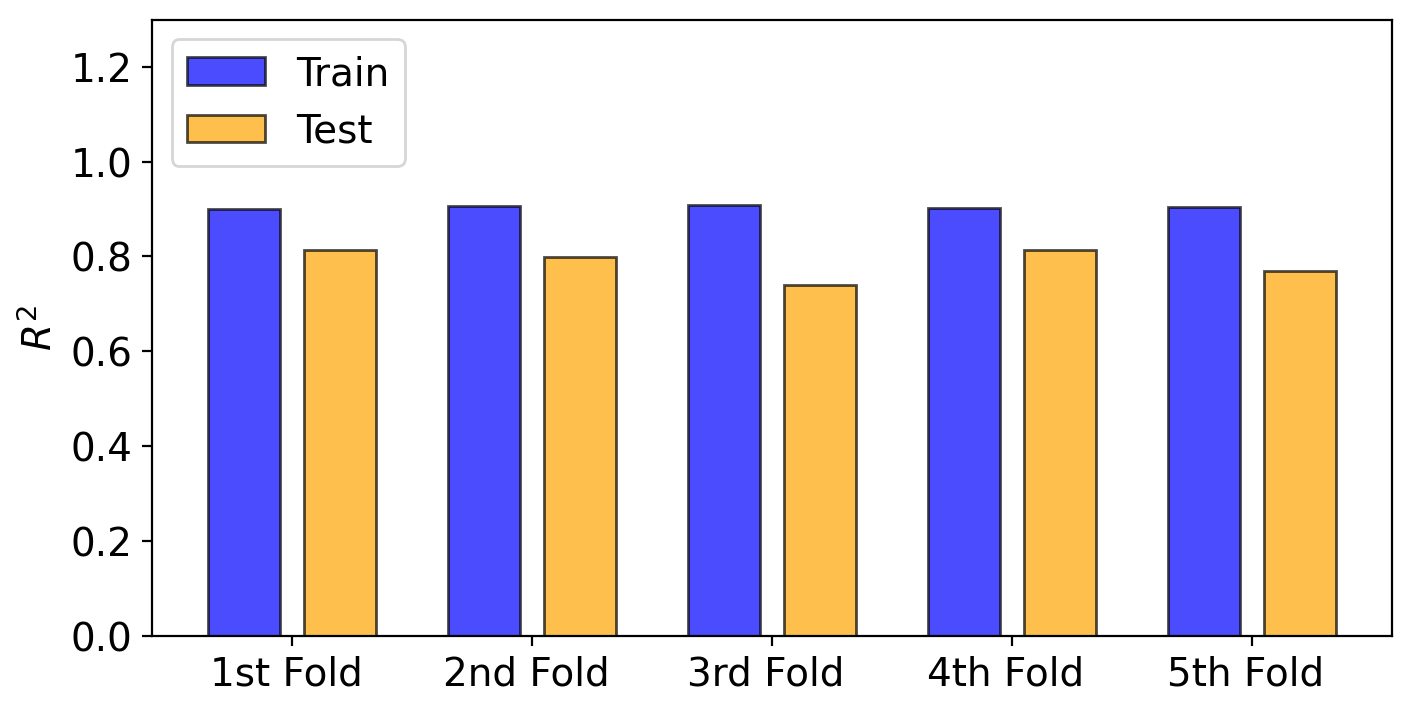

In [43]:
model_name = ""

plot_result(model_name,
                r'$R^{2}$',
                "",
                r2_array_total[0],
                r2_array_total[1],
               (0.00, 1.3)
               )

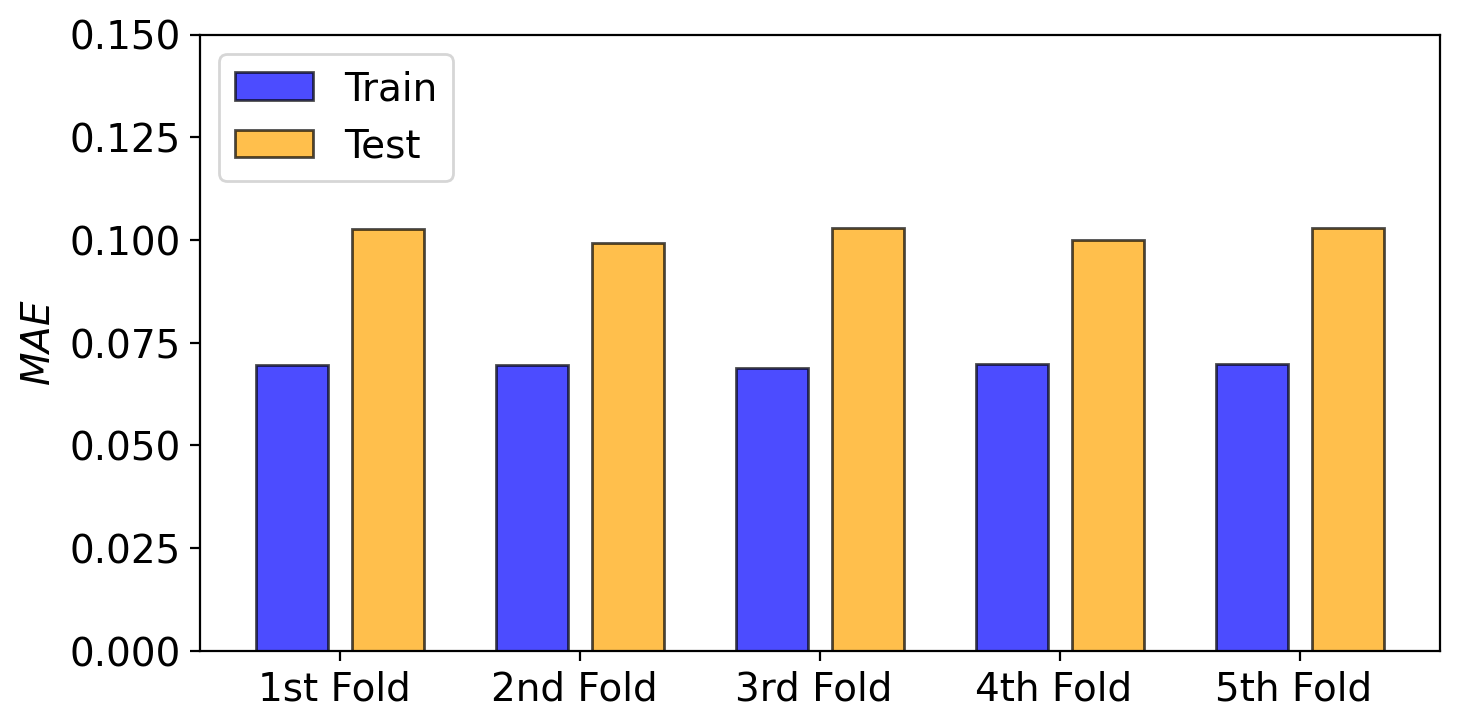

In [44]:
plot_result(model_name,
            "$MAE$",
            "",
            mae_array_total[0],
            mae_array_total[1],
           (0.0, 0.15)
           )

# Learning Curve

In [47]:
# Set a random seed to ensure reproducibility across runs

def Spliting_Data(data_grid, randomsplit):
    np.random.seed(seed=randomsplit)
    
    unique_formulae = data_grid['formula'].unique()
    # Store a list of all unique formulae
    
    all_formulae = unique_formulae.copy()

    # Define the proportional size of the dataset split
    val_size = 0.20
    test_size = 0.00
    train_size = 1 - val_size - test_size

    # Calculate the number of samples in each dataset split
    num_val_samples = int(round(val_size * len(unique_formulae)))
    num_test_samples = int(round(test_size * len(unique_formulae)))
    num_train_samples = int(round((1 - val_size - test_size) * len(unique_formulae)))

    # Randomly choose the formulate for the validation dataset, and remove those from the unique formulae list
    val_formulae = np.random.choice(all_formulae, size=num_val_samples, replace=False)
    all_formulae = [f for f in all_formulae if f not in val_formulae]

    # Randomly choose the formulate for the test dataset, and remove those from the unique formulae list
    test_formulae = np.random.choice(all_formulae, size=num_test_samples, replace=False)
    all_formulae = [f for f in all_formulae if f not in test_formulae]

    # The remaining formulae will be used for the training dataset
    train_formulae = all_formulae.copy()

    print('Number of training formulae:', len(train_formulae))
    print('Number of validation formulae:', len(val_formulae))
    print('Number of testing formulae:', len(test_formulae))
    # Split the original dataset into the train/validation/test datasets using the formulae lists above
    
    df_train = df2[df2['formula'].isin(train_formulae)]
    df_val = df2[df2['formula'].isin(val_formulae)]
    df_test = df2[df2['formula'].isin(test_formulae)]

    print(f'train dataset shape: {df_train.shape}')
    print(f'validation dataset shape: {df_val.shape}')
    print(f'test dataset shape: {df_test.shape}\n')

    return df_train, df_val,_

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

learning_curve_train_mse = []
learning_curve_train_mae = []
learning_curve_train_r2 = []

learning_curve_test_mse = []
learning_curve_test_mae = []
learning_curve_test_r2 = []
dataList = [1000,2000,3000, 4000, 7000, 11000, 16000  , 18126]
def learning_curve_tao():
    data_list = dataList
    for arr in data_list:
        #X_learning_curve = X[0:arr]
        #y_learning_curve = Y[0:arr]
        data_grid = df2[0:arr]
        df_train, df_val,_ = Spliting_Data(data_grid, 52)
        
        
      
        X_train_unscaled = df_train.drop(columns=['formula','zt'])
        X_val_unscaled = df_val.drop(columns=['formula','zt'])

        X_train_unscaled = X_train_unscaled[features]
        X_val_unscaled = X_val_unscaled[features]
        
        y_train = df_train[['zt']]
        y_val = df_val[['zt']]
      
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train_unscaled)
        X_val = scaler.transform(X_val_unscaled)


        X_train = normalize(X_train)
        X_val = normalize(X_val)


        xgb_model_s=XGBRegressor(
                    learning_rate=0.02, 
                    max_depth=4, 
                    n_estimators=1500, 
                    colsample_bytree=1.0, 
                    subsample=1,
                    reg_alpha=6,
        )
        xgb_model_s.fit(X_train, y_train)
                      
        y_pred_train = xgb_model_s.predict(X_train)
        mse_train = mean_squared_error(y_train, y_pred_train)**(1/2)
        mae_train = mean_absolute_error(y_train, y_pred_train)
        r2_train = r2_score(y_train, y_pred_train)
                      
        y_pred_test = xgb_model_s.predict(X_val)
        mse_test = mean_squared_error(y_val, y_pred_test)**(1/2)
        mae_test = mean_absolute_error(y_val, y_pred_test)
        r2_test = r2_score(y_val, y_pred_test)
                      
            
            
                   
        learning_curve_train_mse.append(mse_train)
        learning_curve_train_mae.append(mae_train)
        learning_curve_train_r2.append(r2_train)


        
        learning_curve_test_mse.append(mse_test)
        learning_curve_test_mae.append(mae_test)
        learning_curve_test_r2.append(r2_test)
    return True
        
        

In [49]:
C = learning_curve_tao()

Number of training formulae: 146
Number of validation formulae: 36
Number of testing formulae: 0
train dataset shape: (819, 77)
validation dataset shape: (184, 77)
test dataset shape: (0, 77)

Number of training formulae: 296
Number of validation formulae: 74
Number of testing formulae: 0
train dataset shape: (1585, 77)
validation dataset shape: (420, 77)
test dataset shape: (0, 77)

Number of training formulae: 431
Number of validation formulae: 108
Number of testing formulae: 0
train dataset shape: (2357, 77)
validation dataset shape: (655, 77)
test dataset shape: (0, 77)

Number of training formulae: 509
Number of validation formulae: 127
Number of testing formulae: 0
train dataset shape: (3198, 77)
validation dataset shape: (808, 77)
test dataset shape: (0, 77)

Number of training formulae: 881
Number of validation formulae: 220
Number of testing formulae: 0
train dataset shape: (5643, 77)
validation dataset shape: (1358, 77)
test dataset shape: (0, 77)

Number of training formulae

In [50]:
learning_curve_train_r2, learning_curve_test_r2

([0.7709390348304901,
  0.8552824063882374,
  0.8532517003590782,
  0.8762074985015267,
  0.8658820702317825,
  0.9073817321748421,
  0.9130667782866085,
  0.9033438170429882],
 [0.3949536692236634,
  0.6443846244816016,
  0.7245312993168886,
  0.7046526511782012,
  0.7005635904988265,
  0.776558989402879,
  0.798239744861353,
  0.7951926417877866])

In [51]:
learning_curve_train_mae, learning_curve_test_mae

([0.09054567737301336,
  0.0943605252002027,
  0.08465417117738265,
  0.06788940566945062,
  0.06676825953094324,
  0.06543888441905117,
  0.06647888818593836,
  0.06914065663937531],
 [0.14338867282697546,
  0.131779954750371,
  0.11083258543178115,
  0.10756044460419849,
  0.09744128538722052,
  0.10655253505449531,
  0.10674023908216386,
  0.10325015458810652])

overflow encountered in exp


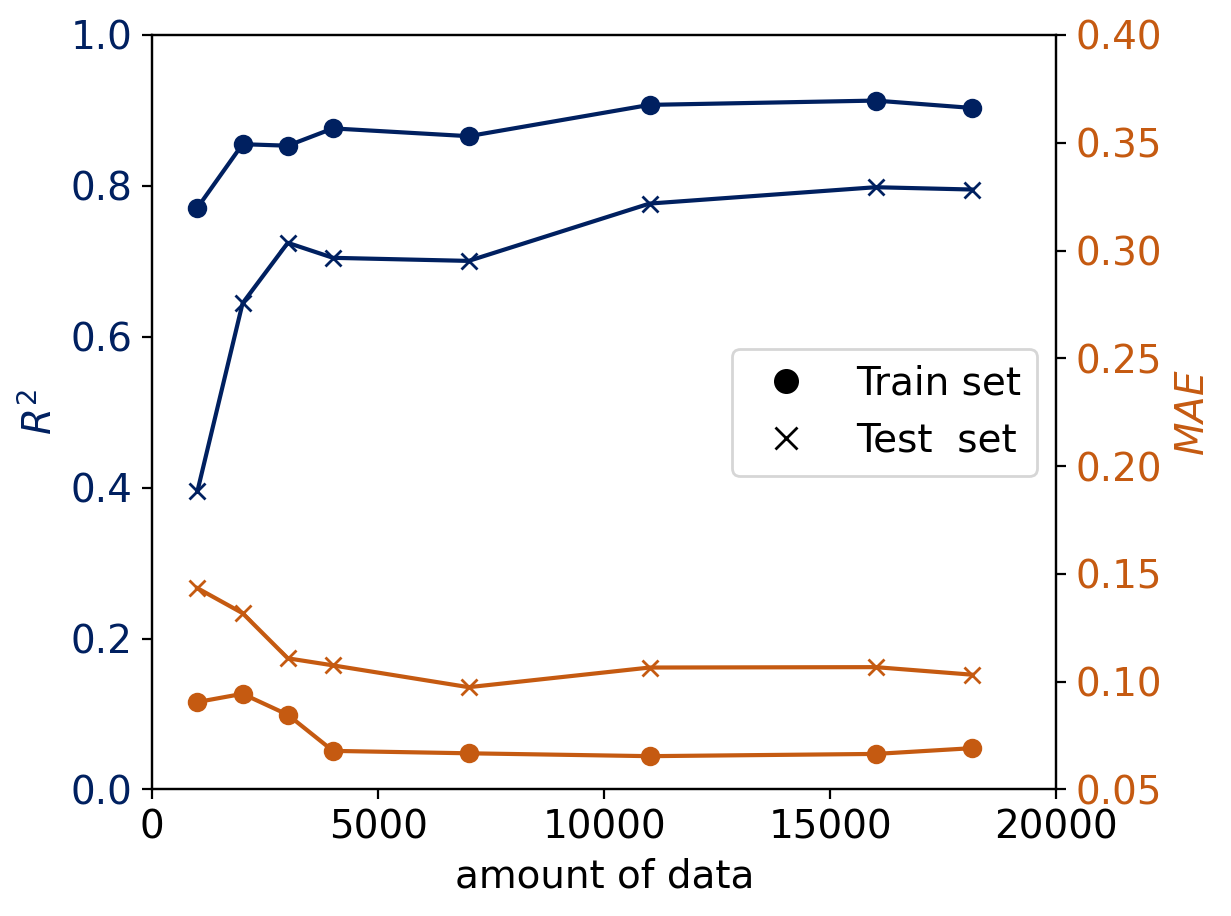

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
# Create some mock data
t = np.arange(0, 19000, 2000)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()


color = '#002060'
color2 = '#C55A11'
ax1.set_xlabel('amount of data')
ax1.set_ylabel(r'$R^{2}$', color=color)
ax1.axis([0,20000, 0, 1])
ax1.plot(dataList, learning_curve_train_r2, marker = 'o',color=color, )
ax1.plot(dataList, learning_curve_test_r2, marker = 'x', color=color, )
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


ax2.set_ylabel('$MAE$', color=color2)  # we already handled the x-label with ax1
ax2.axis([0,20000, 0.05, 0.4])
ax2.plot(dataList, learning_curve_train_mae, marker = 'o', color=color2,  )
ax2.plot(dataList, learning_curve_test_mae, marker = 'x', color=color2, )
ax2.tick_params(axis='y', labelcolor=color2)


blue_star = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=8, label='Train set')
red_square = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                          markersize=8, label='Test  set')


plt.legend(handles=[blue_star, red_square], loc='center right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()